# Untersuchung von 3D-Bilddaten mit pyclesperanto
Dieses Notebook demonstriert, wie man durch 3D-Bilder navigieren kann.

In [1]:
import pyclesperanto_prototype as cle

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage.io import imread

In [2]:
# Laod example data
input_image = imread('../../data/Haase_MRT_tfl3d1.tif')

## Scheibe kopieren
Um bestimmte Scheiben zu visualisieren, ohne dass das Bild den GPU-Speicher verlässt, verwenden Sie die Methode `copy_slice`.

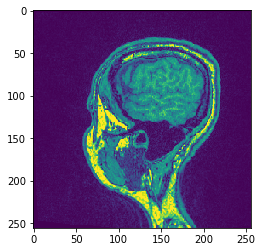

In [3]:
# Copy Slice
image_slice = cle.create([256, 256]);
slice_z_position = 40.0;
cle.copy_slice(input_image, image_slice, slice_z_position)

# show result
cle.imshow(image_slice)

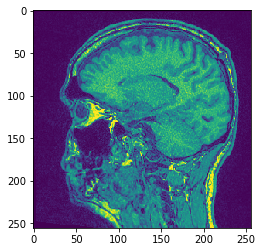

In [4]:
# Alternatively, don't hand over the output image and retrieve it
another_slice = cle.create_2d_xy(input_image)
cle.copy_slice(input_image, another_slice, slice_index = 80)

# show result
cle.imshow(another_slice)

## Projektion
pyclesperanto bietet Min/Mittelwert/Max und Summen-Projektionen in x, y und z.

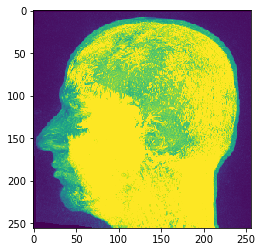

In [5]:
# Maximum Z Projection
projection = cle.maximum_z_projection(input_image)

# show result
cle.imshow(projection)

Wenn Sie einen Bildstapel an `cle.imshow` übergeben, erstellt es für Sie die Maximumintensitätsprojektion entlang Z:

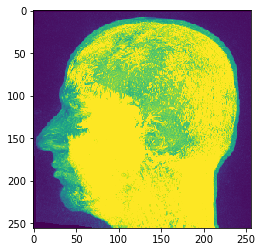

In [6]:
cle.imshow(input_image)

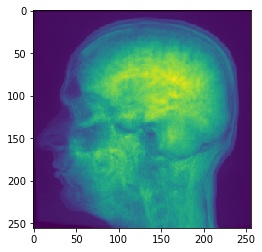

In [7]:
# Sum Z Projection
projection = cle.sum_z_projection(input_image)

# show result
cle.imshow(projection)

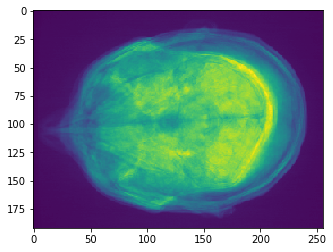

In [8]:
# Mean Y Projection
projection = cle.mean_y_projection(input_image)

# show result
cle.imshow(projection)

## XZ transponieren
Um Achsen von Bildern in der GPU zu transponieren, verwenden Sie die Transponierungsmethoden

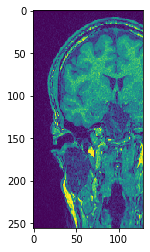

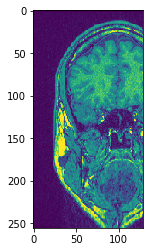

In [9]:
# Transpose X against Z
transposed_image = cle.create([256, 256, 129]);
cle.transpose_xz(input_image, transposed_image)

# show result
cle.imshow(transposed_image[126])
cle.imshow(transposed_image[98])

Verwenden Sie Subplots, um sie nebeneinander zu platzieren

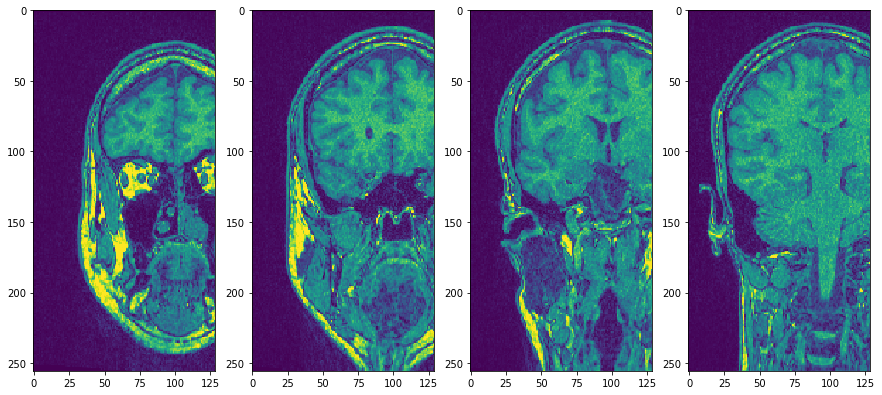

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(15, 7))
cle.imshow(transposed_image[75], plot=axs[0])
cle.imshow(transposed_image[100], plot=axs[1])
cle.imshow(transposed_image[125], plot=axs[2])
cle.imshow(transposed_image[150], plot=axs[3])